<a href="https://colab.research.google.com/github/gremlin97/RacialBiasDetectionAndMitigationCSE598/blob/main/FinalRacialBiasDetectionAndMitigationCSE598.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pandas as pd
import os

In [130]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/COCO2014ValDemographicAnnotations-20221202T083559Z-001.zip

Archive:  /content/drive/MyDrive/COCO2014ValDemographicAnnotations-20221202T083559Z-001.zip
  inflating: COCO2014ValDemographicAnnotations/README.pdf  
  inflating: COCO2014ValDemographicAnnotations/images_val2014.csv  
  inflating: COCO2014ValDemographicAnnotations/instances_2014all.csv  


In [6]:
df = pd.read_csv('/content/COCO2014ValDemographicAnnotations/images_val2014.csv')

In [7]:
df.sample(10)

,id,skin,ratio,bb_skin,bb_gender,split
5123,215244,"['Light', 'Dark', 'Light']","[0.045453059623430964, 0.025784518828451883, 0...",Light,Male,train
6170,261558,['Light'],[0.3412044270833333],Light,Male,train
9039,381608,['Light'],[0.03592652224824356],Light,Female,train
12425,525183,['Unsure'],[0.09669894366197183],Unsure,Unsure,train
8815,371365,['Light'],[0.02880859375],Light,Female,train
12711,537297,"['Light', 'Light', 'Light']","[0.19757228387850467, 0.13248758761682242, 0.0...",Light,Female,train
7774,328596,['Light'],[0.24460260538641687],Light,Female,train
8221,347087,"['Light', 'Light']","[0.0727346278317152, 0.22395580501618123]",Light,Unsure,train
11248,475403,['Light'],[0.13001234407484408],Light,Male,train
8840,372580,['Light'],[0.021933823529411766],Light,NaN,train


In [8]:
df.describe()

,id
count,15762.000000
mean,291073.385103
std,167921.637049
min,136.000000
25%,147033.250000
50%,292421.500000
75%,437198.750000
max,581886.000000


In [9]:
df_f = df[df['split'] == 'train']

In [10]:
df_f.sample(20)

,id,skin,ratio,bb_skin,bb_gender,split
1853,78627,[nan],[0.04006933333333333],NaN,Male,train
6175,261774,['Light'],[0.4345963855421687],Light,Unsure,train
13280,560757,['Unsure'],[0.037382903981264634],Unsure,Unsure,train
4565,192932,['Light'],[0.083876953125],Light,Female,train
5282,222771,"['Unsure', 'Unsure', 'Light']","[0.025226873536299765, 0.027462675644028104, 0...",Light,Male,train
7965,336049,"['Light', nan]","[0.02960699648711944, 0.024659689695550352]",Light,Male,train
3513,149165,"['Dark', 'Dark']","[0.04203244478619334, 0.044221773676790976]",Dark,Male,train
1480,62491,['Light'],[0.0216015625],Light,Unsure,train
9622,407146,[nan],[0.03430913348946136],NaN,Male,train
1094,45053,"['Light', 'Unsure', 'Light', 'Unsure', 'Unsure']","[0.0292388916015625, 0.0766265869140625, 0.192...",Light,Female,train


In [11]:
id = df_f['id'] 
tone = df_f['bb_skin']

In [12]:
#!unzip -q '/content/drive/MyDrive/annotations_trainval2014.zip'

In [13]:
!unzip -q '/content/drive/MyDrive/annotations_trainval2017 (2).zip'

In [14]:
coco = COCO('/content/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=14.80s)
creating index...
index created!


In [15]:
imgIds=sorted(coco.getImgIds())
imgId = imgIds[np.random.randint(100)]

In [16]:
len(imgIds)

118287

In [17]:
type(imgIds)

list

In [18]:
imgIds[1]

25

In [19]:
imgId = imgIds[1]

In [20]:
img = coco.loadImgs(imgId)

In [21]:
img

[{'license': 1,
  'file_name': '000000000025.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000000025.jpg',
  'height': 426,
  'width': 640,
  'date_captured': '2013-11-16 14:11:30',
  'flickr_url': 'http://farm1.staticflickr.com/94/241612385_d9e5b891ed_z.jpg',
  'id': 25}]

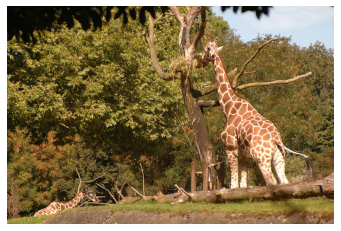

In [22]:
I = io.imread(img[0]['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [23]:
from pycocotools.coco import COCO

In [24]:
id_c = img[0]['id']

In [25]:
category_ids = coco.getCatIds()

In [26]:
# Category IDs.
coco_annotation = coco
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

# Category ID -> Category Name.
query_id = cat_ids[23]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted

In [27]:
z = zip(cat_ids,cat_names)

In [28]:
map = {}
for (x,y) in z:
  map[x] = y

In [29]:
map

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [30]:
cat_names[25]

'umbrella'

In [31]:
annIds = coco.getAnnIds(imgIds=id_c, catIds=category_ids)
annIds
anns = coco.loadAnns(annIds)
# coco.showAnns(anns)
# annsc = anns['category_id'] 

In [32]:
map[anns[0]['category_id']]

'giraffe'

In [33]:
len(anns)

2

In [34]:
id_list = []

for x in id:
  id_list.append(x)

In [35]:
id_list = id_list[0:1000]
ann_list = id_list

In [36]:
# id_list

In [37]:
len(id_list)

1000

In [38]:
# id_list

In [39]:
#=========OLD IMG LIST================#
# img_list = []

# for x in id_list:
#   img = coco.loadImgs(x)
#   I = io.imread(img[0]['coco_url'])
#   img_list.append(I)

In [40]:
Ydual_pred = []
img_list= []

for x in id_list:
  annIds = coco.getAnnIds(imgIds=x, catIds=category_ids)
  anns = coco.loadAnns(annIds)
  Ydual_pred.append(anns[0]['category_id'])
  img = coco.loadImgs(x)
  I = io.imread(img[0]['coco_url'])
  img_list.append(I)

In [41]:
ano_dis = []

for x in id_list:
  annIds = coco.getAnnIds(imgIds=x, catIds=category_ids)
  anns = coco.loadAnns(annIds)
  ano_dis.append(anns[0]['category_id'])

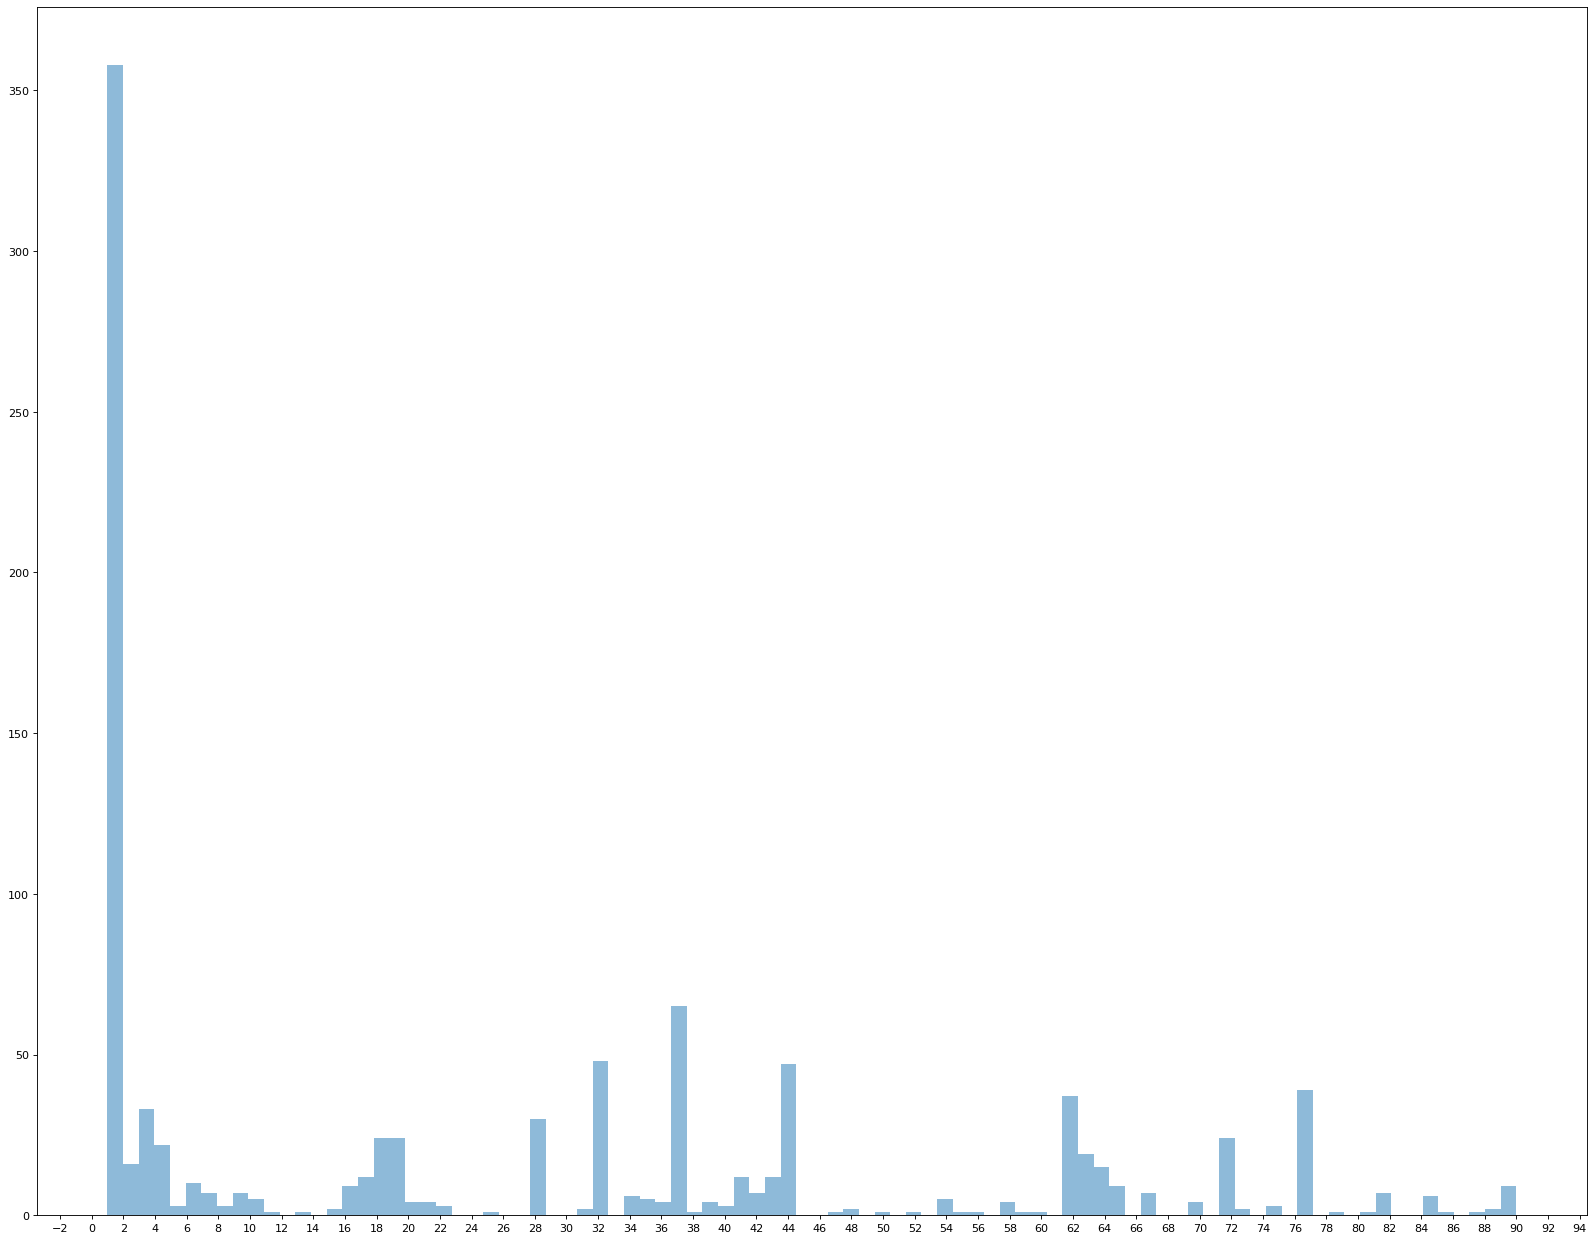

In [42]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20), dpi=80)
plt.hist(ano_dis, bins=90, alpha=0.5)
plt.locator_params(axis='x', nbins=90)

In [43]:
Ydual_pred

[1,
 1,
 44,
 1,
 77,
 82,
 77,
 62,
 43,
 32,
 32,
 1,
 37,
 62,
 37,
 1,
 34,
 15,
 90,
 1,
 35,
 34,
 1,
 43,
 37,
 1,
 1,
 32,
 32,
 32,
 1,
 62,
 1,
 1,
 62,
 5,
 1,
 17,
 63,
 63,
 1,
 20,
 1,
 72,
 28,
 64,
 77,
 67,
 1,
 1,
 1,
 32,
 1,
 3,
 37,
 1,
 2,
 16,
 1,
 1,
 1,
 1,
 1,
 19,
 18,
 1,
 37,
 1,
 1,
 3,
 62,
 44,
 85,
 28,
 19,
 1,
 9,
 77,
 1,
 32,
 70,
 37,
 62,
 19,
 77,
 63,
 19,
 15,
 1,
 1,
 1,
 43,
 6,
 44,
 37,
 1,
 62,
 62,
 37,
 19,
 37,
 1,
 3,
 1,
 3,
 50,
 4,
 7,
 54,
 32,
 64,
 1,
 1,
 2,
 37,
 32,
 38,
 37,
 44,
 37,
 1,
 4,
 1,
 1,
 65,
 19,
 28,
 7,
 1,
 44,
 39,
 18,
 6,
 37,
 3,
 1,
 1,
 1,
 28,
 5,
 1,
 1,
 1,
 6,
 32,
 28,
 41,
 77,
 1,
 77,
 1,
 1,
 44,
 2,
 44,
 20,
 28,
 1,
 1,
 64,
 1,
 65,
 1,
 1,
 1,
 37,
 1,
 1,
 32,
 1,
 1,
 32,
 1,
 9,
 1,
 18,
 20,
 1,
 4,
 77,
 44,
 37,
 37,
 72,
 16,
 1,
 64,
 62,
 1,
 32,
 1,
 65,
 77,
 1,
 77,
 1,
 37,
 37,
 1,
 39,
 1,
 32,
 1,
 41,
 82,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 41,
 59,
 43,
 62,
 32,
 1,
 85,
 44,

In [44]:
img_list[0]

array([[[ 12,  16,  17],
        [  9,  13,  14],
        [ 12,  16,  17],
        ...,
        [ 24,  23,  21],
        [ 26,  25,  23],
        [ 26,  25,  23]],

       [[ 10,  14,  15],
        [  8,  12,  13],
        [ 12,  16,  17],
        ...,
        [ 31,  30,  25],
        [ 33,  33,  25],
        [ 34,  34,  26]],

       [[  9,  13,  14],
        [  8,  12,  13],
        [ 11,  15,  16],
        ...,
        [ 38,  40,  29],
        [ 39,  41,  30],
        [ 40,  42,  31]],

       ...,

       [[ 35,  54, 148],
        [ 38,  57, 151],
        [ 40,  59, 153],
        ...,
        [215, 197, 183],
        [213, 195, 181],
        [220, 202, 188]],

       [[ 38,  57, 152],
        [ 38,  57, 152],
        [ 37,  56, 151],
        ...,
        [214, 196, 182],
        [211, 193, 179],
        [218, 200, 186]],

       [[ 41,  59, 157],
        [ 41,  60, 155],
        [ 39,  58, 153],
        ...,
        [221, 203, 189],
        [218, 200, 186],
        [224, 206, 192]]

In [45]:
len(img_list)

1000

In [46]:
type(img_list)

list

In [47]:
import numpy as np

In [48]:
img_arr = np.array(img_list, dtype='object')

In [49]:
# np.save('img_coco.npy', img_arr, allow_pickle=True) # save
# img_arr_loaded = np.load('img_coco.npy', allow_pickle=True) # load

In [50]:
img_arr.shape 

(1000,)

In [51]:
# img_arr_loaded.shape

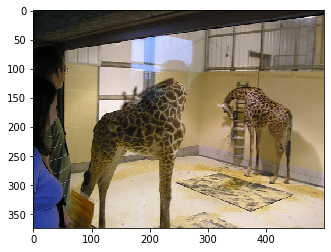

In [52]:
from matplotlib import pyplot as plt
plt.imshow(img_arr[0], interpolation='nearest')
plt.show()

In [53]:
#!cp img_coco.npy /content/drive/MyDrive/

In [54]:
!ls -l --block-size=M

total 1M
drwxr-xr-x 2 root root 1M Dec  5 03:49 annotations
drwxr-xr-x 2 root root 1M Dec  5 03:49 COCO2014ValDemographicAnnotations
drwx------ 5 root root 1M Dec  5 03:49 drive
drwxr-xr-x 1 root root 1M Dec  1 20:08 sample_data


In [55]:
y_list = []
for x in tone:
  if x=='Dark':
    y_list.append(1)
  if x=='Light':
    y_list.append(0)

In [56]:
#y_arr = np.array(y_list)
y_arr = y_list

In [57]:
# y_arr

In [58]:
y_arr = y_arr[0:1000]

In [59]:
multilabel_y = list(zip(Ydual_pred,y_arr))

In [60]:
# for x in multilabel_y:
#   print(x[0])

In [61]:
import random

X = []
y = []

def pet(dualpreds, X, y):
  for x in dualpreds:
    temp = []
    temp.append(x[0])
    y.append(x[1])
    for i in range(5):
      temp.append(random.randint(0,79))
    X.append(temp)
  
  return X,y

dl_x, dl_y = pet(multilabel_y, X,y)
# print(X)
# print(y)

In [62]:
# Dataset Leakage
from sklearn.linear_model import LogisticRegression

In [63]:
X_ = np.array(X)
y_ = np.array(y)

In [64]:
X_.shape, y_.shape

((1000, 6), (1000,))

In [65]:
for lb in y_:
  if np.random.randint(1,10)==5:
    if y_[0] == 1:
      y_[0] = 0
    else:
      y_[1] = 1

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25, random_state=42)

In [67]:
clf = LogisticRegression(C=1000, random_state=42, max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.876

In [68]:
from sklearn import svm
clf = svm.SVC(C=1000, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.756

In [69]:
len(multilabel_y)

1000

In [70]:
len(y_arr)

1000

In [71]:
# for i in range(len(img_arr)):
#   print(id[i])

In [72]:
dictv = {}

for x,y in zip(id_list, y_list):
  dictv[x] = y

In [73]:
len(dictv)

1000

In [74]:
img_arr_rn = img_arr

In [75]:
type(img_arr_rn[0])

numpy.ndarray

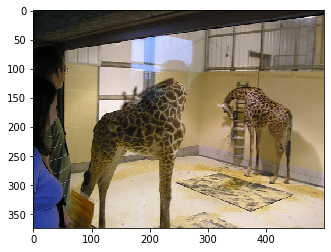

In [76]:
from matplotlib import pyplot as plt
plt.imshow(img_arr_rn[0], interpolation='nearest')
plt.show()

In [77]:
len(img_arr_rn)

1000

In [78]:
type(img_arr_rn)

numpy.ndarray

In [79]:
img_arr_rn[0]

array([[[ 12,  16,  17],
        [  9,  13,  14],
        [ 12,  16,  17],
        ...,
        [ 24,  23,  21],
        [ 26,  25,  23],
        [ 26,  25,  23]],

       [[ 10,  14,  15],
        [  8,  12,  13],
        [ 12,  16,  17],
        ...,
        [ 31,  30,  25],
        [ 33,  33,  25],
        [ 34,  34,  26]],

       [[  9,  13,  14],
        [  8,  12,  13],
        [ 11,  15,  16],
        ...,
        [ 38,  40,  29],
        [ 39,  41,  30],
        [ 40,  42,  31]],

       ...,

       [[ 35,  54, 148],
        [ 38,  57, 151],
        [ 40,  59, 153],
        ...,
        [215, 197, 183],
        [213, 195, 181],
        [220, 202, 188]],

       [[ 38,  57, 152],
        [ 38,  57, 152],
        [ 37,  56, 151],
        ...,
        [214, 196, 182],
        [211, 193, 179],
        [218, 200, 186]],

       [[ 41,  59, 157],
        [ 41,  60, 155],
        [ 39,  58, 153],
        ...,
        [221, 203, 189],
        [218, 200, 186],
        [224, 206, 192]]

In [80]:
from torchvision import transforms

tr = transforms.Compose([
        transforms.Resize([224,224]),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [81]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class SingDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.Tensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
targets = y_arr
dataset = SingDataset(data, targets, transform=tr)
dataloader = DataLoader(dataset, batch_size=4)

In [282]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class StDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.Tensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
yc = np.array(Ydual_pred)
targets = yc
stdataset = StDataset(data, targets, transform=tr)
stdataloader = DataLoader(stdataset, batch_size=4)

In [83]:
len(dataset)

1000

In [84]:
next(iter(dataset))

(tensor([[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
          [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
          [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
          ...,
          [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
          [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
          [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
         [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
          [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
          [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
          ...,
          [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
          [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
          [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
         [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
          [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
          [0.0588, 0.0667, 0.0745,  ...,

In [85]:
v = [(1,2),(3,4)]
v = torch.tensor(v)
print(v[0])

tensor([1, 2])


In [86]:
for x in multilabel_y:
  if x[0]>82:
    print(x[0])

90
85
85
86
85
90
90
90
85
89
90
90
88
90
89
85
85
90
90


In [87]:
# y = 4
# g = 1
# arre = np.zeros(82)
# arre[y-1] = 1
# if g==1:
#   arre[81] = 1
# else:
#   arre[80] = 1
# print(arre)

def encode(multilabel_y):
  res = []
  for x in multilabel_y:
    temp_arr = np.zeros(90)
    temp_arr[x[0]-1] = 1
    if(x[1]):
      temp_arr[81] = 1
    else:
      temp_arr[80] = 1
    res.append(temp_arr)

  return res

res = encode(multilabel_y) 
res = np.array(res)
print(res) 
ye = res

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [88]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class MultiDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.Tensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
# targets_m = multilabel_y
targets_m = ye
dataset_m = MultiDataset(data, targets_m, transform=tr)
dataloader_m = DataLoader(dataset_m, batch_size=4)

In [89]:
# activation = {}
# def get_activation(name):
#     def hook(model, input, output):
#         activation[name] = output.detach()
#     return hook

In [90]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# tensor_x = torch.Tensor(img_arr_rn) # transform to torch tensor
# tensor_y = torch.Tensor(y_arr)
# tensor_x = tensor_x.reshape([10,3,224,224])

In [91]:
# dataset = TensorDataset(tensor_x,tensor_y) # create your datset
# dataloader = DataLoader(dataset) # create your dataloader

In [92]:
# tensor_x.shape

In [93]:
# tensor_x[0].shape

In [94]:
# v = tensor_x[0].numpy().transpose(1,2,0)
# plt.imshow(v)

In [95]:
len(dataset)

1000

In [96]:
next(iter(dataset))

(tensor([[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
          [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
          [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
          ...,
          [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
          [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
          [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
         [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
          [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
          [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
          ...,
          [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
          [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
          [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
         [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
          [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
          [0.0588, 0.0667, 0.0745,  ...,

In [97]:
next(iter(dataset_m))

(tensor([[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
          [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
          [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
          ...,
          [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
          [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
          [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
         [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
          [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
          [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
          ...,
          [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
          [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
          [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
         [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
          [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
          [0.0588, 0.0667, 0.0745,  ...,

In [98]:
i,o = next(iter(dataset))
np.max(i.numpy())

1.0

In [99]:
c = i.numpy()
c = (c * 255).astype(np.uint8)
print(c)

[[[ 11  12  15 ...  26  26  29]
  [  9  13  14 ...  35  36  37]
  [ 10  12  14 ...  33  31  29]
  ...
  [ 37  38  39 ... 216 215 216]
  [ 37  38  37 ... 216 214 215]
  [ 40  38  39 ... 218 217 218]]

 [[ 15  16  19 ...  26  25  28]
  [ 13  17  18 ...  36  37  38]
  [ 14  16  18 ...  33  32  30]
  ...
  [ 56  57  58 ... 198 197 198]
  [ 56  57  56 ... 198 196 197]
  [ 58  57  58 ... 200 199 200]]

 [[ 16  17  20 ...  22  21  24]
  [ 14  18  19 ...  26  28  29]
  [ 15  17  19 ...  34  32  29]
  ...
  [148 150 152 ... 184 183 184]
  [150 151 149 ... 184 182 183]
  [154 151 150 ... 186 185 186]]]


In [100]:
# tensor_y.shape

In [101]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [102]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [103]:
dataset_sizes = len(dataset)
print(dataset_sizes)

1000


In [104]:
def train_model(model, criterion, optimizer, scheduler,  dataloader, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        #model.train()
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.type(torch.LongTensor)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase

            loss.backward()
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes
        epoch_acc = running_corrects.double() / dataset_sizes

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')    
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [105]:
def train_model_st(model, criterion, optimizer, scheduler,  dataloader, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        #model.train()
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.type(torch.LongTensor)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase

            loss.backward()
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes
        epoch_acc = running_corrects.double() / dataset_sizes

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')    
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [106]:
from sklearn.metrics import hamming_loss
prob = torch.tensor([0.3,0.4,0.6,0.7])
out = (prob>0.5).float()
label = torch.tensor([0,0,1,1])
(1-hamming_loss(label, out))*100

100.0

In [107]:
model_ft_n = models.resnet18(pretrained=True)
num_ftrs = model_ft_n.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft_n.fc = nn.Sequential(nn.Dropout(0.1),
                         nn.Linear(model_ft_n.fc.in_features, 64),
                         nn.Linear(64, 2))
# model_ft_n.fc = nn.Linear(num_ftrs, 64)
# model_ft_n.fc1 = nn.Linear(64, 2)

model_ft_n = model_ft_n.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.SGD(model_ft_n.parameters(), lr=3e-4, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [280]:
model_ft_onlyst = models.resnet18(pretrained=True)
num_ftrs = model_ft_onlyst.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft_onlyst.fc = nn.Sequential(nn.Dropout(0.1),
                         nn.Linear(model_ft_onlyst.fc.in_features, 128),
                         nn.Linear(128,91))
# model_ft_onlyst.fc = nn.Linear(num_ftrs, 64)
# model_ft_onlyst.fc1 = nn.Linear(64, 2)

model_ft_onlyst = model_ft_onlyst.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_st = torch.optim.SGD(model_ft_onlyst.parameters(), lr=3e-4, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler_st = lr_scheduler.StepLR(optimizer_st, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [109]:
# multilabel_y

In [110]:
m = map
mil = list(m.items())
mapL = []
for x in mil:
  tempL = []
  tl = list(x)
  tempL.append(tl[1])
  tempL.append(tl[0])
  mapL.append(tempL)

print(mapL)

[['person', 1], ['bicycle', 2], ['car', 3], ['motorcycle', 4], ['airplane', 5], ['bus', 6], ['train', 7], ['truck', 8], ['boat', 9], ['traffic light', 10], ['fire hydrant', 11], ['stop sign', 13], ['parking meter', 14], ['bench', 15], ['bird', 16], ['cat', 17], ['dog', 18], ['horse', 19], ['sheep', 20], ['cow', 21], ['elephant', 22], ['bear', 23], ['zebra', 24], ['giraffe', 25], ['backpack', 27], ['umbrella', 28], ['handbag', 31], ['tie', 32], ['suitcase', 33], ['frisbee', 34], ['skis', 35], ['snowboard', 36], ['sports ball', 37], ['kite', 38], ['baseball bat', 39], ['baseball glove', 40], ['skateboard', 41], ['surfboard', 42], ['tennis racket', 43], ['bottle', 44], ['wine glass', 46], ['cup', 47], ['fork', 48], ['knife', 49], ['spoon', 50], ['bowl', 51], ['banana', 52], ['apple', 53], ['sandwich', 54], ['orange', 55], ['broccoli', 56], ['carrot', 57], ['hot dog', 58], ['pizza', 59], ['donut', 60], ['cake', 61], ['chair', 62], ['couch', 63], ['potted plant', 64], ['bed', 65], ['dining 

In [111]:
sml_list = []
for x in list(m.values()):
  sml_tmp = []
  sml_tmp.append(x)
  sml_list.append(sml_tmp)

In [112]:
# sml_list

In [113]:
from sklearn.preprocessing import OneHotEncoder
enc_exp = OneHotEncoder(handle_unknown='ignore')
enc_exp.fit(mapL)
enc_exp.transform([['person', 1]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [114]:
# for x in multilabel_y:
#   print(x[0])

In [115]:
type(ye)

numpy.ndarray

In [116]:
sml_list[0]

['person']

In [117]:
from sklearn.preprocessing import OneHotEncoder
sml_arr = np.asarray(sml_list)
enc = OneHotEncoder(sparse=False)
onehot = enc.fit_transform(sml_list)
print(enc.transform([['person']]))
print(enc.inverse_transform([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[['person']]


In [118]:
# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [119]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(mapL)
enc.transform([['person', 1], ['motorcycle', 4]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [120]:
model_ft_mn = models.resnet18(pretrained=True)

model_ft_mn.fc = nn.Sequential(nn.Dropout(0.1),
                         nn.Linear(model_ft_mn.fc.in_features, 256),
                         nn.Linear(256, 90))

model_ft_mn = model_ft_mn.to(device)

criterion_m = nn.BCEWithLogitsLoss()

optimizer_ftm = torch.optim.Adam(model_ft_mn.parameters(), lr=3e-4)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler_m = lr_scheduler.StepLR(optimizer_ftm, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [121]:
model_ft_mn

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [122]:
CUDA_LAUNCH_BLOCKING=1

In [123]:
out = model_ft_mn(torch.rand(4,3,224,224).to(device))

In [124]:
torch.max(out.data,1)

torch.return_types.max(
values=tensor([1.0007, 0.9817, 1.2860, 1.0779], device='cuda:0'),
indices=tensor([59, 45, 60, 45], device='cuda:0'))

In [125]:
torch.max(out,1)

torch.return_types.max(
values=tensor([1.0007, 0.9817, 1.2860, 1.0779], device='cuda:0',
       grad_fn=<MaxBackward0>),
indices=tensor([59, 45, 60, 45], device='cuda:0'))

In [126]:
model_ft_n

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [127]:
model_ft_n.fc[2]

Linear(in_features=64, out_features=2, bias=True)

In [131]:
model_ft_n = train_model(model_ft_n, criterion, optimizer, exp_lr_scheduler, dataloader, num_epochs=10)

Epoch 0/9
----------
Train Loss: 0.4333 Acc: 0.9000

Epoch 1/9
----------
Train Loss: 0.4338 Acc: 0.9020

Epoch 2/9
----------
Train Loss: 0.4340 Acc: 0.9010

Epoch 3/9
----------
Train Loss: 0.4338 Acc: 0.9000

Epoch 4/9
----------
Train Loss: 0.4353 Acc: 0.9010

Epoch 5/9
----------
Train Loss: 0.4339 Acc: 0.9010

Epoch 6/9
----------
Train Loss: 0.4333 Acc: 0.9010

Epoch 7/9
----------
Train Loss: 0.4352 Acc: 0.9020

Epoch 8/9
----------
Train Loss: 0.4320 Acc: 0.9010

Epoch 9/9
----------
Train Loss: 0.4336 Acc: 0.9020



In [132]:
for inputs, labels in stdataloader:
  print(inputs.shape,labels.shape)
  break

torch.Size([4, 3, 224, 224]) torch.Size([4])


In [133]:
# Ydual_pred

In [283]:
# model_ft_onlyst.to(device)
model_ft_st = train_model_st(model_ft_onlyst, criterion, optimizer_st, exp_lr_scheduler_st, stdataloader, num_epochs=100)

Epoch 0/99
----------
Train Loss: 4.2404 Acc: 0.0760

Epoch 1/99
----------
Train Loss: 4.2310 Acc: 0.0880

Epoch 2/99
----------
Train Loss: 4.2378 Acc: 0.0840

Epoch 3/99
----------
Train Loss: 4.2268 Acc: 0.0950

Epoch 4/99
----------
Train Loss: 4.2254 Acc: 0.0920

Epoch 5/99
----------
Train Loss: 4.2302 Acc: 0.0850

Epoch 6/99
----------
Train Loss: 4.2308 Acc: 0.0880

Epoch 7/99
----------
Train Loss: 4.2244 Acc: 0.0870

Epoch 8/99
----------
Train Loss: 4.2297 Acc: 0.0980

Epoch 9/99
----------
Train Loss: 4.2252 Acc: 0.0830

Epoch 10/99
----------
Train Loss: 4.2321 Acc: 0.0750

Epoch 11/99
----------
Train Loss: 4.2311 Acc: 0.0930

Epoch 12/99
----------
Train Loss: 4.2319 Acc: 0.0810

Epoch 13/99
----------
Train Loss: 4.2333 Acc: 0.0880

Epoch 14/99
----------
Train Loss: 4.2321 Acc: 0.0860

Epoch 15/99
----------
Train Loss: 4.2282 Acc: 0.0840

Epoch 16/99
----------
Train Loss: 4.2296 Acc: 0.0800

Epoch 17/99
----------
Train Loss: 4.2249 Acc: 0.0890

Epoch 18/99
--------

In [165]:
model_ft_st.fc

Sequential(
  (0): Dropout(p=0.1, inplace=False)
  (1): Linear(in_features=512, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=91, bias=True)
)

In [215]:
activation_onlyst = {}

dataloader_modelleakage_st = DataLoader(stdataset, batch_size=64)

def get_activation_st(name):
    def hook(model, input, output):
        #print(model)
        activation_onlyst[name] = output.detach()
    return hook


modelst = model_ft_st

modelst = modelst.to(device)
modelst.fc[1].register_forward_hook(get_activation_st('mf1st'))

xst = next(iter(dataloader_modelleakage_st))
xst = xst[0]
xst = xst.to(device)
st_y = xst[1]
output_st = modelst(xst)
print(output_st)

tensor([[ 0.3680, -0.1027, -0.5012,  ..., -0.5832, -0.4072,  0.1407],
        [ 0.1415,  0.3570, -0.8148,  ..., -0.1183, -0.4563,  0.5546],
        [ 0.2698,  0.0215, -0.0574,  ..., -0.5858, -0.2200,  0.1035],
        ...,
        [-0.1630, -0.2367,  0.0392,  ..., -0.0786, -0.2304,  0.8196],
        [ 0.1866,  0.1573, -0.1800,  ...,  0.0187, -0.4711,  0.3552],
        [ 0.0411,  0.5282, -0.1991,  ..., -0.2916, -0.4142,  0.2929]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [216]:
activation_onlyst

{'mf1st': tensor([[ 0.0783, -0.8921,  0.8755,  ..., -1.1958, -1.0554, -1.0146],
         [ 0.3780,  0.3608,  0.2099,  ..., -0.4083, -0.3699, -1.2298],
         [-0.0783,  0.6408,  0.4064,  ..., -0.8263, -0.5140, -0.4597],
         ...,
         [-0.1883,  0.5322,  0.9637,  ..., -0.5329, -0.4971, -0.2987],
         [-0.9480, -0.3004,  0.9828,  ..., -0.1112, -0.1790, -0.8951],
         [-0.4786, -0.5174,  0.5150,  ...,  0.6941,  0.2200, -1.3185]],
        device='cuda:0')}

In [217]:
stv_ml = activation_onlyst['mf1st']

In [218]:
activation_onlyst['mf1st'].shape

torch.Size([64, 128])

In [140]:
next(iter(dataloader))[0].shape

torch.Size([4, 3, 224, 224])

In [141]:
from torch.autograd import Variable

activation_ = {}
def get_activation(name):
    def hook(model, input, output):
        activation_[name] = output.detach()
    return hook

logits = []

modelp = model_ft_n

modelp = modelp.to(device)
#modelp.layer4[1].conv1.register_forward_hook(get_activation('f1'))
modelp.fc[1].register_forward_hook(get_activation('f1p'))
# x = torch.randn(1,3,224,224)
x = next(iter(dataloader))
x = x[0]
x = x.to(device)
ml_y = x[1]
output = modelp(x)
print(output)
# for i,l in dataloader:
#   print(l)
#   print()
#   print(len(activation['f1']))
#   output = modelp(i)
#   # output = torch.randn(5,224,224,3)
#   logits.append(output)

tensor([[ 0.2116, -1.0673],
        [ 0.2229, -0.7450],
        [ 0.7351, -0.4458],
        [ 0.1441, -0.7794]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [142]:
modelp.fc

Sequential(
  (0): Dropout(p=0.1, inplace=False)
  (1): Linear(in_features=512, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=2, bias=True)
)

In [143]:
activation_.keys()

dict_keys(['f1p'])

In [144]:
activation_['f1p'].shape

torch.Size([4, 64])

In [145]:
activation_['f1p'][0].shape

torch.Size([64])

In [146]:
# ml = activation_['f1']
# ml = ml.reshape(4,-1)
# print(ml.shape)

In [147]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
            # nn.Softmax(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [209]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
            # nn.Softmax(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model1 = NeuralNetwork().to(device)
print(model1)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [148]:
y_arr = np.array(y_arr)

In [149]:
# y_arr

In [184]:
activation_ml = {}

dataloader_modelleakage = DataLoader(dataset_m, batch_size=128)

def get_activation_mn(name):
    def hook(model, input, output):
        #print(model)
        activation_ml[name] = output.detach()
    return hook

logits = []

modelm = model_ft_mn

modelm = modelm.to(device)
modelm.fc[1].register_forward_hook(get_activation_mn('mf1'))
# model_ft_mn.layer1[0].conv2
# modelm.fc[1].register_forward_hook(get_activation_mn('mf1'))
x = next(iter(dataloader_modelleakage))
x = x[0]
x = x.to(device)
ml_y = x[1]
output = modelm(x)
print(output)

tensor([[-0.5264,  0.0483, -0.1001,  ..., -0.0013, -0.0792,  0.9139],
        [-0.4913,  0.0296,  0.1012,  ..., -0.2377, -0.1136,  0.9451],
        [-0.1487,  0.3433, -0.3078,  ..., -0.0489,  0.1047,  0.0981],
        ...,
        [-0.4890,  0.2950, -0.0648,  ...,  0.1942,  0.1066,  0.7445],
        [ 0.2156, -0.0540,  0.0231,  ...,  0.0937, -0.5326,  0.6634],
        [-0.5103,  0.3181, -0.7258,  ...,  0.7388, -0.2462,  1.0375]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [185]:
modelm.fc[1]

Linear(in_features=512, out_features=256, bias=True)

In [186]:
model_ft_mn.layer1[0].conv2

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [187]:
activation_ml

{'mf1': tensor([[-0.1849, -0.1922, -0.6676,  ..., -0.4508,  0.7336,  0.5111],
         [ 0.9904,  0.6046,  1.3420,  ..., -0.8276,  0.5930,  0.3863],
         [ 0.3091,  0.5273,  0.5724,  ..., -0.7935,  0.8540, -1.2477],
         ...,
         [ 0.2905,  1.0918, -0.1301,  ..., -1.1619, -0.1279,  0.3084],
         [ 0.7189,  0.9239, -0.4183,  ..., -0.6760, -0.4546, -0.1548],
         [ 0.3676,  0.5982,  0.2369,  ..., -0.6641,  1.0432, -1.1956]],
        device='cuda:0')}

In [188]:
activation_ml['mf1'].shape

torch.Size([128, 256])

In [189]:
dl = activation_ml['mf1']

In [190]:
print(dl.shape)
tensor_x = dl
tensor_y = torch.tensor(y_arr)[:128]
print(tensor_x.shape)
print(tensor_y.shape)

torch.Size([128, 256])
torch.Size([128, 256])
torch.Size([128])


In [191]:
tensor_y

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [192]:
#tensor_x = tensor_x.long()

In [193]:
tensor_x.dtype

torch.float32

In [194]:
tensor_x.shape, tensor_y.shape

(torch.Size([128, 256]), torch.Size([128]))

In [195]:
tensor_y = tensor_y.type(torch.FloatTensor)

In [196]:
# tensor_y = tensor_y.long()

In [197]:
tensor_y.dtype

torch.float32

In [198]:
type(tensor_y)

torch.Tensor

In [199]:
tensor_y

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [200]:
datasetml_atv = TensorDataset(tensor_x,tensor_y) # create your datset
dataloader_ml_atv = DataLoader(datasetml_atv, batch_size=2) # create your dataloader

In [201]:
# for x,y in dataloader_ml_atv:
#   print(x.shape,y.shape)

In [202]:
next(iter(dataloader_ml_atv))

[tensor([[-1.8493e-01, -1.9217e-01, -6.6761e-01, -6.4953e-02,  1.0050e+00,
          -5.3830e-01,  3.2403e-01,  8.6441e-01, -6.1709e-02,  2.6910e-01,
           1.2282e+00,  3.1850e-01, -6.8261e-01,  4.5704e-01, -3.6645e-01,
           6.6293e-01, -7.1290e-02, -3.3817e-01,  1.7013e-01,  1.3319e+00,
          -6.4035e-01, -1.2099e+00,  6.9617e-01, -6.1704e-01, -1.3996e+00,
          -2.1929e-01,  1.4737e+00,  6.3889e-01,  9.6334e-01,  6.1442e-01,
          -1.0616e+00, -1.5734e-01, -5.6658e-01,  8.9946e-01, -6.2655e-01,
           7.8265e-01, -2.4766e-01, -8.8388e-01, -5.1062e-01,  4.2439e-01,
          -3.6444e-01,  1.8426e-02,  6.2733e-01,  4.4897e-01,  1.4337e-01,
          -5.4865e-02, -1.5191e-01, -4.8320e-02, -1.4141e+00,  1.2518e+00,
           1.5988e-01, -1.4873e+00,  7.6430e-01,  1.2708e-01,  3.1630e-01,
          -1.8743e-01, -6.2256e-02, -5.7343e-01, -1.4335e-01, -3.7449e-01,
          -3.6099e-01, -7.4496e-01, -7.3573e-01, -8.5295e-02, -4.9733e-01,
           2.7242e-01,  5

In [203]:
learning_rate = 3e-4
# batch_size = 4
epochs = 10

# Initialize the loss function
# loss_fn = nn.CrossEntropyLoss()

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(dataloader, model, loss_fn, optimizer):
    acc = 0
    size = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.long()
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        #print("Pred is:",pred)
        acc += (torch.softmax(pred, dim=1).argmax(dim=1) == y).sum().float()
        acc = acc.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #running_accuracy += accuracy(pred, y)
        #print("Size is:",size)
        #print("Running Acc:",acc/size)

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    return acc   

# def train_loop(dataloader, model, loss_fn, optimizer):
#     size = len(dataloader.dataset)
#     for batch, (X, y) in enumerate(dataloader):
#         # Compute prediction and loss
#         pred = model(X)
#         loss = loss_fn(pred, y)

#         # Backpropagation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch % 100 == 0:
#             loss, current = loss.item(), batch * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# def test_loop(dataloader, model, loss_fn):
#     size = len(dataloader.dataset)
#     num_batches = len(dataloader)
#     test_loss, correct = 0, 0

#     with torch.no_grad():
#         for X, y in dataloader:
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()

#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [204]:
activation_ml['mf1']

tensor([[-0.1849, -0.1922, -0.6676,  ..., -0.4508,  0.7336,  0.5111],
        [ 0.9904,  0.6046,  1.3420,  ..., -0.8276,  0.5930,  0.3863],
        [ 0.3091,  0.5273,  0.5724,  ..., -0.7935,  0.8540, -1.2477],
        ...,
        [ 0.2905,  1.0918, -0.1301,  ..., -1.1619, -0.1279,  0.3084],
        [ 0.7189,  0.9239, -0.4183,  ..., -0.6760, -0.4546, -0.1548],
        [ 0.3676,  0.5982,  0.2369,  ..., -0.6641,  1.0432, -1.1956]],
       device='cuda:0')

In [205]:
# loss_f = nn.BCELoss()
loss_f = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
correct = 0

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    c = train(dataloader_ml_atv, model, loss_f, optim)
    accuracy = 100 * c / len(datasetml_atv)
    print("Accuracy is:",accuracy)
    # test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.846870  [    0/   64]
Accuracy is: 8.59375
Epoch 2
-------------------------------
loss: 0.816552  [    0/   64]
Accuracy is: 8.59375
Epoch 3
-------------------------------
loss: 0.786583  [    0/   64]
Accuracy is: 8.59375
Epoch 4
-------------------------------
loss: 0.758267  [    0/   64]
Accuracy is: 10.15625
Epoch 5
-------------------------------
loss: 0.730988  [    0/   64]
Accuracy is: 23.4375
Epoch 6
-------------------------------
loss: 0.704716  [    0/   64]
Accuracy is: 53.125
Epoch 7
-------------------------------
loss: 0.679204  [    0/   64]
Accuracy is: 79.6875
Epoch 8
-------------------------------
loss: 0.653103  [    0/   64]
Accuracy is: 89.0625
Epoch 9
-------------------------------
loss: 0.628172  [    0/   64]
Accuracy is: 91.40625
Epoch 10
-------------------------------
loss: 0.605138  [    0/   64]
Accuracy is: 91.40625
Done!


In [214]:
tensor_x_st = activation_onlyst['mf1st']
tensor_y_st = torch.tensor(y_arr)[:64]
print(tensor_x_st.shape)
print(tensor_y_st.shape)
tensor_y_st = tensor_y_st.type(torch.FloatTensor)


stdatasetml_atv = TensorDataset(tensor_x_st,tensor_y_st) # create your datset
stdataloader_ml_atv = DataLoader(stdatasetml_atv, batch_size=2) # create your dataloader



loss_f = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=1)
correct = 0

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    c = train(stdataloader_ml_atv, model1, loss_f, optim)
    accuracy = 100 * c / len(stdatasetml_atv)
    print("Accuracy is:",accuracy)
print("Done!")

torch.Size([64, 128])
torch.Size([64])
Epoch 1
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 2
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 3
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 4
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 5
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 6
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 7
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 8
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 9
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 10
-------------------------------
loss: 0.977476  [    0/   32]
Accuracy is: 9.375
Epoch 11
-------------------------------
loss: 0.977476  [    0/   32]

In [174]:
len(activation_['f1p'])

4

In [175]:
len(activation_['f1p'][1])

64

In [176]:
ye.shape

(1000, 90)

In [177]:
next(iter(dataloader_m))

[tensor([[[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
           [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
           [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
           ...,
           [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
           [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
           [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
          [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
           [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
           [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
           ...,
           [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
           [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
           [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
          [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
           [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
           [0.0588, 0.06

In [178]:
def train_model_ml(model, criterion, optimizer, scheduler,  dataloader, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        #model.train()
        running_loss = 0.0
        running_corrects = 0
        hl = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            outputs = model(inputs)
            #_, preds = torch.max(outputs, 1)
            # print(f'Pred:{outputs}')
            # print(f'LD:{labels}')
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase

            loss.backward()
            optimizer.step()

            pred = torch.nn.Sigmoid()(outputs)
            # print("Pred is",pred)
            # print("Labels are:",labels)
            pred_t = pred.cpu()
            pred_t = (pred>0.5)
            hl+=hamming_loss(labels.cpu(), pred_t.cpu())
            

            # statistics
            running_loss += loss.item() * inputs.size(0)
            #running_corrects += torch.sum(preds.data == labels.data)
            # print(outputs,labels)
            scheduler.step()

        epoch_loss = running_loss/dataset_sizes
        # epoch_acc = running_corrects.double() / dataset_sizes
        # epoch_acc = running_corrects / dataset_sizes

        #print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}') 
        hlm = hl/dataset_sizes
        acc = (1-hlm)*100 
        print(f'Train Loss: {epoch_loss:.4f}')   
        print(f'Accuracy: {acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [179]:
model_ft_mn = train_model_ml(model_ft_mn, criterion_m, optimizer_ftm, exp_lr_scheduler_m, dataloader_m, num_epochs=10)

Epoch 0/9
----------
Train Loss: 0.3318
Accuracy: 99.3028

Epoch 1/9
----------
Train Loss: 0.3241
Accuracy: 99.4575

Epoch 2/9
----------
Train Loss: 0.3239
Accuracy: 99.4575

Epoch 3/9
----------
Train Loss: 0.3240
Accuracy: 99.4483

Epoch 4/9
----------
Train Loss: 0.3239
Accuracy: 99.4492

Epoch 5/9
----------
Train Loss: 0.3241
Accuracy: 99.4622

Epoch 6/9
----------
Train Loss: 0.3236
Accuracy: 99.4606

Epoch 7/9
----------
Train Loss: 0.3240
Accuracy: 99.4550

Epoch 8/9
----------
Train Loss: 0.3242
Accuracy: 99.4636

Epoch 9/9
----------
Train Loss: 0.3241
Accuracy: 99.4583



In [180]:
for xb, yb in dataloader_m:
  print(xb.shape)
  print(yb.shape)
  break

torch.Size([4, 3, 224, 224])
torch.Size([4, 90])


In [181]:
class_names = {1:'Dark', 0:'Light'}
classes=['Dark','Light']

torch.Size([3, 224, 224])
(224, 224, 3) torch.Size([3, 224, 224])


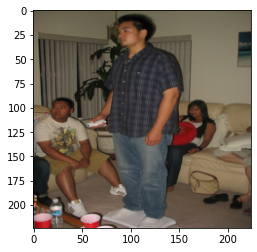

In [182]:
inputs, classes = next(iter(dataloader))
inputs = inputs[2]
inp = inputs
print(inp.shape)
inp = inp.numpy().transpose((1, 2, 0))
print(inp.shape, inputs.shape)
ci = (inp * 255).astype(np.uint8)
plt.imshow(ci)

In [183]:
classes

tensor([0., 0., 1., 0.])

In [274]:
# inp = inp.transpose(1,2,)
# plt.imshow(inp, interpolation='nearest')
# plt.show()

In [275]:
class_names

{1: 'Dark', 0: 'Light'}

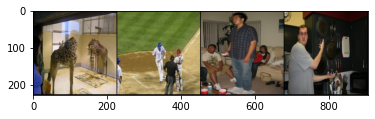

In [276]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = (inp * 255).astype(np.uint8)
    #print(inp.shape)
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # inp = std * inp + mean
    # inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out)

In [277]:
def visualize_model(model, num_images=16):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            print(labels)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            print(preds)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'Predicted: {class_names[preds[j].item()]} | Label:{labels.cpu().data[j]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

tensor([0., 0., 1., 0.], device='cuda:0')
tensor([0, 0, 0, 0], device='cuda:0')


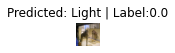

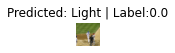

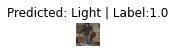

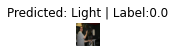

tensor([0., 0., 0., 0.], device='cuda:0')
tensor([0, 0, 0, 0], device='cuda:0')


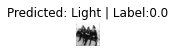

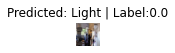

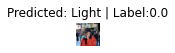

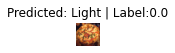

tensor([0., 0., 0., 0.], device='cuda:0')
tensor([0, 0, 0, 0], device='cuda:0')


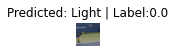

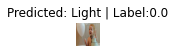

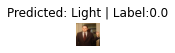

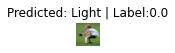

tensor([0., 0., 0., 0.], device='cuda:0')
tensor([0, 0, 0, 0], device='cuda:0')


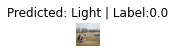

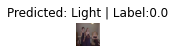

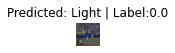

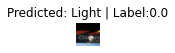

In [278]:
visualize_model(model_ft_n)

In [220]:
!pip install pytorch_revgrad
from pytorch_revgrad import RevGrad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [221]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [222]:
resnet = models.resnet18(pretrained=True)

# for param in resnet.parameters():
#   param.requires_grad = False

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [223]:
class BM(nn.Module):
    def __init__(self, resnet):
        super(BM,self).__init__()
        # Loading pretrained model

        #self.resnet = models.resnet18(pretrained=True)

        #self.resnetft = torch.nn.Sequential(*(list(self.resnet.children())[:-1]))

        self.resnet = resnet

        self.branchadv = nn.Sequential(nn.Flatten(),
                        nn.Dropout(0.1),
                         nn.Linear(512, 64),
                         nn.Linear(64,2),
                         RevGrad())

        
        self.branchtask = nn.Sequential(nn.Flatten(),
                         nn.Dropout(0.1),
                         nn.Linear(512, 256),
                         nn.Linear(256, 91))


 
    def forward(self,x):
        x = self.resnet(x)
        adv = self.branchadv(x)
        task = self.branchtask(x)
        return adv, task


res_ft = torch.nn.Sequential(*(list(resnet.children())[:-1]))
modelbm = BM(res_ft)
modelbm.to(device)

BM(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [224]:
from torchsummary import summary
# m  = models.resnet18(pretrained=True)
modelbm.to(device)
summary(modelbm,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [225]:
modelbm.branchadv

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Dropout(p=0.1, inplace=False)
  (2): Linear(in_features=512, out_features=64, bias=True)
  (3): Linear(in_features=64, out_features=2, bias=True)
  (4): RevGrad()
)

In [226]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class BmDataset(Dataset):
    def __init__(self, data, target1, target2, transform=None):
        self.data = data
        self.target1 = torch.Tensor(target1)
        self.target2 = torch.Tensor(target2)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y1 = self.target1[index]
        y2 = self.target2[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y1, y2
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
yc = np.array(Ydual_pred)
target1 = yc
target2 = y_arr
datasetbm = BmDataset(data, target1, target2, transform=tr)
dataloaderbm = DataLoader(datasetbm, batch_size=4)

In [227]:
# next(iter(dataloaderbm))

In [228]:
for x,y1,y2 in dataloaderbm:
  print(x.shape,y1.shape,y2.shape)
  break

torch.Size([4, 3, 224, 224]) torch.Size([4]) torch.Size([4])


In [229]:
# model = models.resnet18(pretrained=True)
# newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))
# print(newmodel)

In [230]:
out1, out2 = modelbm(torch.randn(4,3,224,224).to(device))
print(out1.shape,out2.shape)

torch.Size([4, 2]) torch.Size([4, 91])


In [231]:
# criterion_bm = nn.CrossEntropyLoss()
# optimizer_bm_task = torch.optim.Adam(modelbm.branchtask.parameters(), lr=3e-7)
# optimizer_bm_adv = torch.optim.Adam(modelbm.branchadv.parameters(), lr=3e-4)
# ds = len(datasetbm)

# def train_bm(model, criterion, opt1, opt2, dataloader, lamda, num_epochs=25):
#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0

#     for epoch in range(num_epochs):
#         print(f'Epoch {epoch}/{num_epochs - 1}')
#         print('-' * 10)
#         running_loss = 0.0
#         running_corrects = 0

#         # Iterate over data.
#         for inputs, label1, label2 in dataloader:
#             inputs = inputs.to(device)

#             label1 = label1.type(torch.LongTensor)
#             label1 = label1.to(device)

#             label2 = label2.type(torch.LongTensor)
#             label2 = label2.to(device)


#             # zero the parameter gradients
#             opt1.zero_grad()
#             opt2.zero_grad()

#             # forward
#             out_adv, out_task = modelbm(inputs)
#             loss_task = criterion(out_task, label1)
#             loss_adv = criterion(out_adv, label2)

#             # backward + optimize only if in training phase
#             print(loss_adv,loss_task)

#             loss = loss_adv - lamda*loss_task
#             #loss = loss_adv

#             loss.backward()
#             opt1.step()
#             opt2.step()

#             # statistics
#             _, preds = torch.max(out_task, 1)
#             # print("Predictions:",preds)
#             # print("Labels:",label1)
#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == label1.data)

#         epoch_loss = running_loss / ds
#         epoch_acc = running_corrects.double() / ds

#         print(f'Train Loss: {epoch_loss:.4f}')    
#         print(f'Train Accuracy: {epoch_acc:.4f}')  
#         print()

#     # load best model weights
#     model.load_state_dict(best_model_wts)
#     return model

In [232]:
criterion_bm = nn.CrossEntropyLoss()
optimizer_bm = torch.optim.Adam(filter(lambda p: p.requires_grad, modelbm.parameters()), lr=3e-6)
ds = len(datasetbm)

def train_bm(model, criterion, opt, dataloader, lamda, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, label1, label2 in dataloader:
            inputs = inputs.to(device)

            label1 = label1.type(torch.LongTensor)
            label1 = label1.to(device)

            label2 = label2.type(torch.LongTensor)
            label2 = label2.to(device)


            # zero the parameter gradients
            opt.zero_grad()

            # forward
            out_adv, out_task = modelbm(inputs)
            loss_task = criterion(out_task, label1)
            loss_adv = criterion(out_adv, label2)

            # backward + optimize only if in training phase
            # print(loss_adv,loss_task)

            loss = loss_task - lamda*loss_adv
            #loss = loss_adv

            loss.backward()
            opt.step()

            # statistics
            _, preds = torch.max(out_task, 1)
            # print("Predictions:",preds)
            # print("Labels:",label1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == label1.data)

        epoch_loss = running_loss / ds
        epoch_acc = running_corrects.double() / ds

        print(f'Train Loss: {epoch_loss:.4f}')    
        print(f'Train Accuracy: {epoch_acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [233]:
model_bm_trained = train_bm(modelbm, criterion_bm, optimizer_bm, dataloaderbm, 0.5, num_epochs=50)
# model_bm_trained = train_bm(modelbm, criterion_bm, optimizer_bm_task, optimizer_bm_adv, dataloaderbm, 0.5, num_epochs=2)

Epoch 0/49
----------
Train Loss: 3.9483
Train Accuracy: 0.2140

Epoch 1/49
----------
Train Loss: 3.4254
Train Accuracy: 0.3580

Epoch 2/49
----------
Train Loss: 3.0781
Train Accuracy: 0.3580

Epoch 3/49
----------
Train Loss: 2.8877
Train Accuracy: 0.3580

Epoch 4/49
----------
Train Loss: 2.7335
Train Accuracy: 0.3580

Epoch 5/49
----------
Train Loss: 2.6091
Train Accuracy: 0.3580

Epoch 6/49
----------
Train Loss: 2.4880
Train Accuracy: 0.3580

Epoch 7/49
----------
Train Loss: 2.3850
Train Accuracy: 0.3620

Epoch 8/49
----------
Train Loss: 2.2890
Train Accuracy: 0.3630

Epoch 9/49
----------
Train Loss: 2.1933
Train Accuracy: 0.3730

Epoch 10/49
----------
Train Loss: 2.1091
Train Accuracy: 0.3930

Epoch 11/49
----------
Train Loss: 2.0392
Train Accuracy: 0.4130

Epoch 12/49
----------
Train Loss: 1.9635
Train Accuracy: 0.4290

Epoch 13/49
----------
Train Loss: 1.8955
Train Accuracy: 0.4590

Epoch 14/49
----------
Train Loss: 1.8291
Train Accuracy: 0.4870

Epoch 15/49
--------

In [237]:
model_bm_trained.branchtask[2]

Linear(in_features=512, out_features=256, bias=True)

In [238]:
activation_onlymb = {}

dataloader_modelleakage_mb = DataLoader(datasetbm, batch_size=64)

def get_activation_mb(name):
    def hook(model, input, output):
        #print(model)
        activation_onlymb[name] = output.detach()
    return hook


modelmb = model_bm_trained

modelmb = modelmb.to(device)
modelmb.branchtask[2].register_forward_hook(get_activation_mb('fmb'))

xmb = next(iter(dataloader_modelleakage_mb))
xmb = xmb[0]
xmb = xmb.to(device)
mb_y = xmb[1]
output_mb = modelmb(xmb)
print(output_mb)

(tensor([[ 0.6994,  0.5029],
        [ 0.5660,  0.5185],
        [ 0.3889,  0.0360],
        [ 0.2806,  0.8743],
        [ 0.3346,  0.0814],
        [ 0.0698,  0.0553],
        [-0.4510, -0.1433],
        [ 0.8012,  0.2921],
        [ 0.7574,  0.6575],
        [ 0.2957,  0.3001],
        [ 0.1263, -0.0338],
        [ 0.6021,  0.0999],
        [ 0.2348,  0.1406],
        [ 0.3294,  0.1409],
        [ 0.4629,  0.4786],
        [ 0.8709,  0.5031],
        [ 0.8416,  0.1006],
        [ 0.1035,  0.2261],
        [ 0.6882,  0.7185],
        [ 0.7220,  0.3445],
        [ 0.2995,  0.3014],
        [-0.1026,  0.0760],
        [ 0.1942,  0.2708],
        [ 0.7280,  0.4507],
        [ 0.4056,  0.2240],
        [ 0.3931,  0.2341],
        [ 0.3147,  0.4823],
        [ 0.1770,  0.3807],
        [ 0.1221,  0.2533],
        [ 0.5353, -0.0349],
        [ 0.4732, -0.1913],
        [ 0.4985,  0.0580],
        [ 0.1204,  0.7751],
        [ 0.3043,  0.6025],
        [ 0.4678, -0.0256],
        [ 0.4807,  

In [240]:
activation_onlymb['fmb'].shape

torch.Size([64, 256])

In [244]:
tensor_x_st = activation_onlymb['fmb']
tensor_y_st = torch.tensor(y_arr)[:64]
print(tensor_x_st.shape)
print(tensor_y_st.shape)
tensor_y_st = tensor_y_st.type(torch.FloatTensor)

dsmb = TensorDataset(tensor_x_st,tensor_y_st) # create your datset
dlmb  = DataLoader(dsmb, batch_size=2) # create your dataloader



loss_f = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
correct = 0

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    c = train(dlmb, model, loss_f, optim)
    accuracy = 100 * c / len(stdatasetml_atv)
    print("Accuracy is:",accuracy)
print("Done!")

torch.Size([64, 256])
torch.Size([64])
Epoch 1
-------------------------------
loss: 0.657016  [    0/   32]
Accuracy is: 85.9375
Epoch 2
-------------------------------
loss: 0.646950  [    0/   32]
Accuracy is: 90.625
Epoch 3
-------------------------------
loss: 0.636960  [    0/   32]
Accuracy is: 90.625
Epoch 4
-------------------------------
loss: 0.627030  [    0/   32]
Accuracy is: 90.625
Epoch 5
-------------------------------
loss: 0.617301  [    0/   32]
Accuracy is: 90.625
Epoch 6
-------------------------------
loss: 0.607715  [    0/   32]
Accuracy is: 90.625
Epoch 7
-------------------------------
loss: 0.598192  [    0/   32]
Accuracy is: 90.625
Epoch 8
-------------------------------
loss: 0.588707  [    0/   32]
Accuracy is: 90.625
Epoch 9
-------------------------------
loss: 0.579312  [    0/   32]
Accuracy is: 90.625
Epoch 10
-------------------------------
loss: 0.570045  [    0/   32]
Accuracy is: 90.625
Done!


In [245]:
# m = BM(res_ft).to(device)
# O1,O2 = m(torch.randn(4,3,224,224).to(device))
# print(O1)

In [246]:
# m

In [247]:
# resnet = models.resnet18(pretrained=True)
# res_ft = torch.nn.Sequential(*(list(resnet.children())[0:9]))
# res_ft

In [248]:
res_ft[7][0].conv2

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [249]:
from torchsummary import summary
from torchvision.models import resnet18

resnet = resnet18(pretrained=True)
resnet.to(device)
summary(resnet,(3,224,224))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [250]:
# class BM_mc(nn.Module):
#     def __init__(self):
#         super(BM_mc,self).__init__()

#         resnet = models.resnet18(pretrained=True)

#         self.rp1 = torch.nn.Sequential(*(list(resnet.children())[0:5]))

#         self.branchadv1 = nn.Sequential(nn.AdaptiveMaxPool2d((7,7)),
#                         nn.Flatten(),
#                         nn.Dropout(0.1),
#                          nn.Linear(3136,512),
#                          nn.Linear(512, 64),
#                          RevGrad())
        
#         self.rp2 = torch.nn.Sequential(*(list(resnet.children())[5:6]))

#         self.branchadv2 = nn.Sequential(nn.AdaptiveMaxPool2d((5,5)),
#                         nn.Flatten(),
#                         nn.Dropout(0.1),
#                          nn.Linear(3200,1024),
#                          nn.Linear(1024, 64),
#                          nn.Linear(512, 64),
#                          RevGrad())
        
#         self.rp3 = torch.nn.Sequential(*(list(resnet.children())[6:7]))
        
#         self.branchadv3 = nn.Sequential(nn.AdaptiveMaxPool2d((3,3)),
#                         nn.Flatten(),
#                         nn.Dropout(0.1),
#                          nn.Linear(2304,512),
#                          nn.Linear(512, 64),
#                          RevGrad())
        
#         self.fin_adv = nn.Linear(64,32)

#         self.rp4 = torch.nn.Sequential(*(list(resnet.children())[7:9]))

#         self.identity = torch.nn.Identity()
        
#         self.branchtask = nn.Sequential(nn.Flatten(),
#                          nn.Dropout(0.1),
#                          nn.Linear(512, 256),
#                          nn.Linear(256, 91))


#     def forward(self,x):
#         x = self.rp1(x)
#         x1 = self.branchadv1(x)
#         x = self.rp2(x)
#         x2 = self.branchadv2
#         x = self.rp3(x)
#         x3 = self.branchadv3(x)
#         x = self.rp4(x)
#         x1 = self.fin_adv(x1)
#         x2 = self.fin_adv(x2)
#         x3 = self.fin_adv(x3)
#         adv = torch.cat((x1,x2,x3),1)
#         task = self.branchtask(x)
#         return adv, task

# modelbm_mc = BM_mc()
# modelbm_mc.to(device)

In [251]:
class BM_mc(nn.Module):
    def __init__(self):
        super(BM_mc,self).__init__()

        resnet = models.resnet18(pretrained=True)
        
        self.rp1 = torch.nn.Sequential(*(list(resnet.children())[0:5]))
        self.pool1 = nn.AdaptiveMaxPool2d((7,7))
        self.flat1 = nn.Flatten()
        self.drop1 = nn.Dropout(0.1)
        self.linad1 = nn.Linear(3136,512)
        self.linear1 = nn.Linear(512, 64)
        self.fin_adv1 = nn.Linear(64,32)
        self.revg1 = RevGrad()
    
        self.rp2 = torch.nn.Sequential(*(list(resnet.children())[5:6]))
        self.pool2 = nn.AdaptiveMaxPool2d((5,5))
        self.flat2 = nn.Flatten()
        self.drop2 = nn.Dropout(0.1)
        self.linear3 = nn.Linear(3200,1024)
        self.linear4 = nn.Linear(1024, 64)
        self.fin_adv2 = nn.Linear(64,32)
        self.revg2 = RevGrad()
        
        self.rp3 = torch.nn.Sequential(*(list(resnet.children())[6:7]))
        self.pool3 = nn.AdaptiveMaxPool2d((3,3))
        self.flat3 = nn.Flatten()
        self.drop3 = nn.Dropout(0.1)
        self.linear5 = nn.Linear(2304,512)
        self.linear6 = nn.Linear(512, 64)
        self.fin_adv3 = nn.Linear(64,32)
        self.revg3 = RevGrad()

        self.rp4 = torch.nn.Sequential(*(list(resnet.children())[7:9]))

        self.flat4 = nn.Flatten()
        self.drop4 = nn.Dropout(0.1)
        self.linear7 = nn.Linear(512, 256)
        self.task = nn.Linear(256, 91)

        self.fc1 = nn.Linear(96,12)
        self.fc2 = nn.Linear(12,2)


    def forward(self,x):
        x = self.rp1(x)

        x1 = self.pool1(x)
        x1 = self.flat1(x1)
        x1 = self.drop1(x1)
        x1 = self.linad1(x1)
        x1 = self.linear1(x1)
        x1 = self.fin_adv1(x1)
        x1 = self.revg1(x1)

        x = self.rp2(x)
        x2 = self.pool2(x)
        x2 = self.flat2(x2)
        x2 = self.drop2(x2)
        x2 = self.linear3(x2)
        x2 = self.linear4(x2)
        x2 = self.fin_adv2(x2)
        x2 = self.revg2(x2)

        x = self.rp3(x)
        x3 = self.pool3(x)
        x3 = self.flat3(x3)
        x3 = self.drop3(x3)
        x3 = self.linear5(x3)
        x3 = self.linear6(x3)
        x3 = self.fin_adv3(x3)
        x3 = self.revg3(x3)

        task = self.rp4(x)
        task = self.flat4(task)
        task = self.drop4(task)
        task = self.linear7(task)
        task = self.task(task)


        # x2 = self.revg(self.fin_adv(self.linear4(self.linear3(self.drop(self.flat(self.pool2(x)))))))
        # x3 = self.revg(self.fin_adv(self.linear1(self.linear5(self.drop(self.flat(self.pool3(x)))))))
        # task = self.task(self.linear6(self.drop(self.flatten(x))))
        
        adv = torch.cat((x1,x2,x3),1)
        adv = self.fc1(adv)
        adv = self.fc2(adv)
        
        return adv, task

modelbm_mc = BM_mc()
modelbm_mc.to(device)

BM_mc(
  (rp1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [252]:
m = BM_mc().to(device)
O1, O2 = m(torch.randn(4,3,224,224).to(device))
print(O1.shape, O2.shape)

torch.Size([4, 2]) torch.Size([4, 91])


In [253]:
!pip install torchviz
from graphviz import Digraph
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=283c6c24003edd5e562879877647a680282766e75f8ef2ae5e18d912a29be6d6
  Stored in directory: /root/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


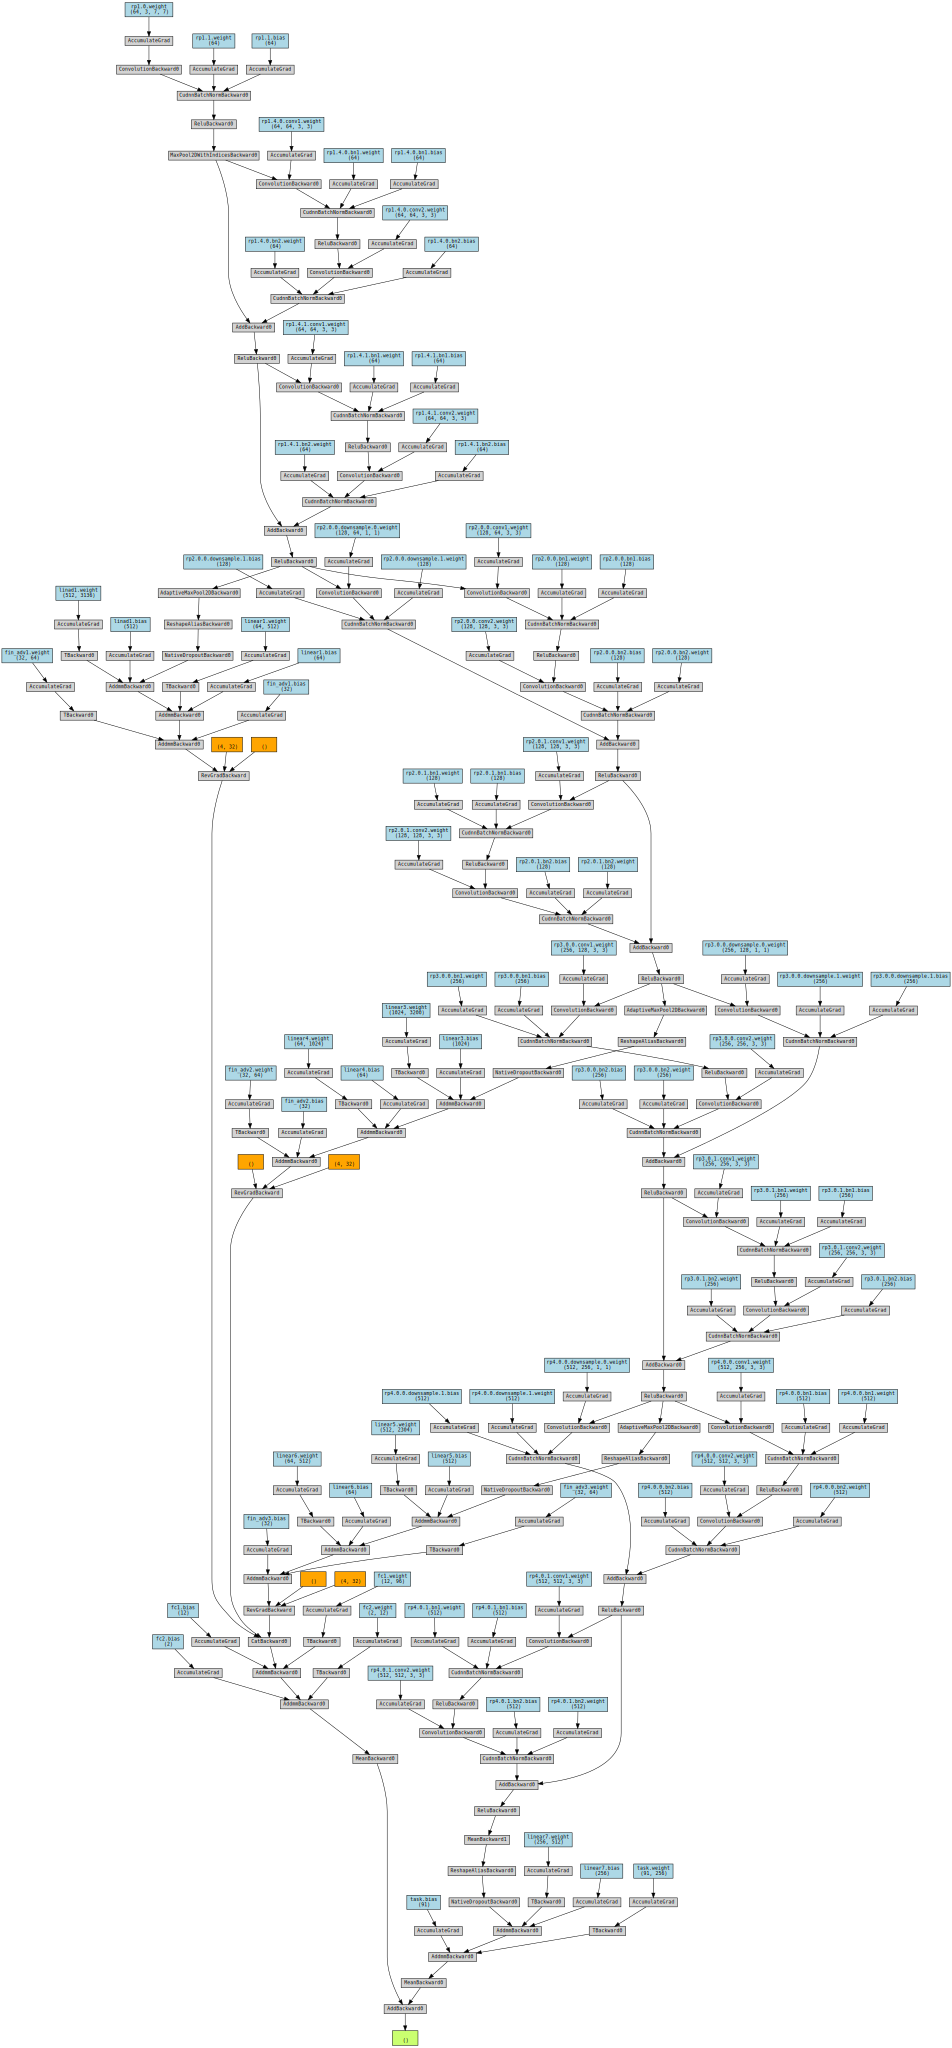

In [254]:
y = m(torch.randn(4,3,224,224).to(device))
make_dot(y[0].mean()+y[1].mean(), params=dict(m.named_parameters()))

In [255]:
from torchsummary import summary

modelbm_mc.to(device)
summary(modelbm_mc,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [256]:
x = torch.randn(32)
print(x.shape)
v1 = torch.cat((x, x, x), 0)
# v2 = torch.cat((x, x, x), 1)
print(v1.shape)
# print(v2.shape)


torch.Size([32])
torch.Size([96])


In [257]:
criterion_bm = nn.CrossEntropyLoss()
optimizer_bm = torch.optim.Adam(filter(lambda p: p.requires_grad, modelbm_mc.parameters()), lr=3e-6)
ds = len(datasetbm)

def train_bm_mc(model, criterion, opt, dataloader, lamda, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, label1, label2 in dataloader:
            inputs = inputs.to(device)

            label1 = label1.type(torch.LongTensor)
            label1 = label1.to(device)

            label2 = label2.type(torch.LongTensor)
            label2 = label2.to(device)


            # zero the parameter gradients
            opt.zero_grad()

            # forward
            out_adv, out_task = model(inputs)
            loss_task = criterion(out_task, label1)
            loss_adv = criterion(out_adv, label2)

            # backward + optimize only if in training phase
            # print(loss_adv,loss_task)

            loss = loss_task - lamda*loss_adv
            #loss = loss_adv

            loss.backward()
            opt.step()

            # statistics
            _, preds = torch.max(out_task, 1)
            # print("Predictions:",preds)
            # print("Labels:",label1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == label1.data)

        epoch_loss = running_loss / ds
        epoch_acc = running_corrects.double() / ds

        print(f'Train Loss: {epoch_loss:.4f}')    
        print(f'Train Accuracy: {epoch_acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [258]:
model_bm_mc_trained = train_bm_mc(modelbm_mc, criterion_bm, optimizer_bm, dataloaderbm, 0.5, num_epochs=10)

Epoch 0/9
----------
Train Loss: 4.1124
Train Accuracy: 0.1160

Epoch 1/9
----------
Train Loss: 3.5021
Train Accuracy: 0.3570

Epoch 2/9
----------
Train Loss: 3.0950
Train Accuracy: 0.3580

Epoch 3/9
----------
Train Loss: 2.8776
Train Accuracy: 0.3580

Epoch 4/9
----------
Train Loss: 2.7187
Train Accuracy: 0.3580

Epoch 5/9
----------
Train Loss: 2.5947
Train Accuracy: 0.3580

Epoch 6/9
----------
Train Loss: 2.4726
Train Accuracy: 0.3580

Epoch 7/9
----------
Train Loss: 2.3574
Train Accuracy: 0.3590

Epoch 8/9
----------
Train Loss: 2.2584
Train Accuracy: 0.3640

Epoch 9/9
----------
Train Loss: 2.1629
Train Accuracy: 0.3760



In [259]:
# !pip install torchviz
# !pip install hiddenlayer
# from graphviz import Digraph
# from torchviz import make_dot

In [260]:
batch = next(iter(dataloaderbm))

In [261]:
# import hiddenlayer as hl

# transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

# graph = hl.build_graph(modelbm_mc, batch, transforms=tr)
# graph.theme = hl.graph.THEMES['blue'].copy()
# graph.save('Check', format='png')

In [262]:
class BM_ae(nn.Module):
    def __init__(self, resnet):
        super(BM_ae,self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1), # -> N, 16, 112, 112
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2), # -> N, 16, 56, 56
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 28, 28
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2), # -> N, 32, 14, 14
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # -> N, 64, 7, 7
            nn.ReLU(),
            nn.Conv2d(64, 128, 7) # -> N, 128, 1, 1
        )

        self.flat1 = nn.Flatten()
        self.drop1 = nn.Dropout(0.1)
        self.lin1 = nn.Linear(128, 64)
        self.lin2 = nn.Linear(64,32)
        self.rg1 = RevGrad()

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 7), # -> N, 64, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 14, 14 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 28, 28 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 56, 56 
            nn.ReLU(),
            nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 112, 112 
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1), # N, 3, 224, 224 
            nn.Sigmoid()
        )

        self.flat2 = nn.Flatten()
        self.drop2 = nn.Dropout(0.1)
        self.lin3 = nn.Linear(512, 64)
        self.lin4 = nn.Linear(64,32)
        self.rg2 = RevGrad()

        self.resnet = resnet

        
        self.branchtask = nn.Sequential(nn.Flatten(),
                         nn.Dropout(0.1),
                         nn.Linear(512, 256),
                         nn.Linear(256, 91))
        
        self.fc1 = nn.Linear(64,16)
        self.fc2 = nn.Linear(16,2)

 
    def forward(self,x):
        xe = self.encoder(x)

        x1 = self.flat1(xe)
        x1 = self.drop1(x1) 
        x1 = self.lin1(x1) 
        x1 = self.lin2(x1)
        x1 = self.rg1(x1)

        xd = self.decoder(xe)

        xr = self.resnet(xd)

        x2 = self.flat2(xr)
        x2 = self.drop2(x2)
        x2 = self.lin3(x2)
        x2 = self.lin4(x2)
        x2 = self.rg2(x2)

        task = self.branchtask(xr)

        adv = torch.cat((x1,x2),1)
        adv = self.fc1(adv)
        adv = self.fc2(adv)

        return adv, task


res_ft = torch.nn.Sequential(*(list(resnet.children())[:-1]))
modelbm_ae = BM_ae(res_ft)
modelbm_ae.to(device)

BM_ae(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
  )
  (flat1): Flatten(start_dim=1, end_dim=-1)
  (drop1): Dropout(p=0.1, inplace=False)
  (lin1): Linear(in_features=128, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=32, bias=True)
  (rg1): RevGrad()
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    

In [263]:
from torchsummary import summary
# m  = models.resnet18(pretrained=True)
modelbm_ae.to(device)
summary(modelbm_ae,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             448
              ReLU-2         [-1, 16, 112, 112]               0
         MaxPool2d-3           [-1, 16, 56, 56]               0
            Conv2d-4           [-1, 32, 28, 28]           4,640
              ReLU-5           [-1, 32, 28, 28]               0
         MaxPool2d-6           [-1, 32, 14, 14]               0
            Conv2d-7             [-1, 64, 7, 7]          18,496
              ReLU-8             [-1, 64, 7, 7]               0
            Conv2d-9            [-1, 128, 1, 1]         401,536
          Flatten-10                  [-1, 128]               0
          Dropout-11                  [-1, 128]               0
           Linear-12                   [-1, 64]           8,256
           Linear-13                   [-1, 32]           2,080
          RevGrad-14                   

In [264]:
criterion_bm_ae = nn.CrossEntropyLoss()
optimizer_bm_ae = torch.optim.Adam(filter(lambda p: p.requires_grad, modelbm_ae.parameters()), lr=3e-6)
ds = len(datasetbm)

def train_bm_mc(model, criterion, opt, dataloader, lamda, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, label1, label2 in dataloader:
            inputs = inputs.to(device)

            label1 = label1.type(torch.LongTensor)
            label1 = label1.to(device)

            label2 = label2.type(torch.LongTensor)
            label2 = label2.to(device)


            # zero the parameter gradients
            opt.zero_grad()

            # forward
            out_adv, out_task = model(inputs)
            loss_task = criterion(out_task, label1)
            loss_adv = criterion(out_adv, label2)

            # backward + optimize only if in training phase
            # print(loss_adv,loss_task)

            loss = loss_task - lamda*loss_adv
            #loss = loss_adv

            loss.backward()
            opt.step()

            # statistics
            _, preds = torch.max(out_task, 1)
            # print("Predictions:",preds)
            # print("Labels:",label1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == label1.data)

        epoch_loss = running_loss / ds
        epoch_acc = running_corrects.double() / ds

        print(f'Train Loss: {epoch_loss:.4f}')    
        print(f'Train Accuracy: {epoch_acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [265]:
model_bm_ae = train_bm_mc(modelbm_ae, criterion_bm_ae, optimizer_bm_ae, dataloaderbm, 0.6, num_epochs=100)

Epoch 0/99
----------
Train Loss: 3.4220
Train Accuracy: 0.3310

Epoch 1/99
----------
Train Loss: 3.0696
Train Accuracy: 0.3580

Epoch 2/99
----------
Train Loss: 2.9755
Train Accuracy: 0.3580

Epoch 3/99
----------
Train Loss: 2.9285
Train Accuracy: 0.3580

Epoch 4/99
----------
Train Loss: 2.8894
Train Accuracy: 0.3580

Epoch 5/99
----------
Train Loss: 2.8564
Train Accuracy: 0.3580

Epoch 6/99
----------
Train Loss: 2.8320
Train Accuracy: 0.3580

Epoch 7/99
----------
Train Loss: 2.7975
Train Accuracy: 0.3580

Epoch 8/99
----------
Train Loss: 2.7824
Train Accuracy: 0.3580

Epoch 9/99
----------
Train Loss: 2.7582
Train Accuracy: 0.3580

Epoch 10/99
----------
Train Loss: 2.7427
Train Accuracy: 0.3580

Epoch 11/99
----------
Train Loss: 2.7218
Train Accuracy: 0.3580

Epoch 12/99
----------
Train Loss: 2.7104
Train Accuracy: 0.3580

Epoch 13/99
----------
Train Loss: 2.6912
Train Accuracy: 0.3580

Epoch 14/99
----------
Train Loss: 2.6750
Train Accuracy: 0.3580

Epoch 15/99
--------

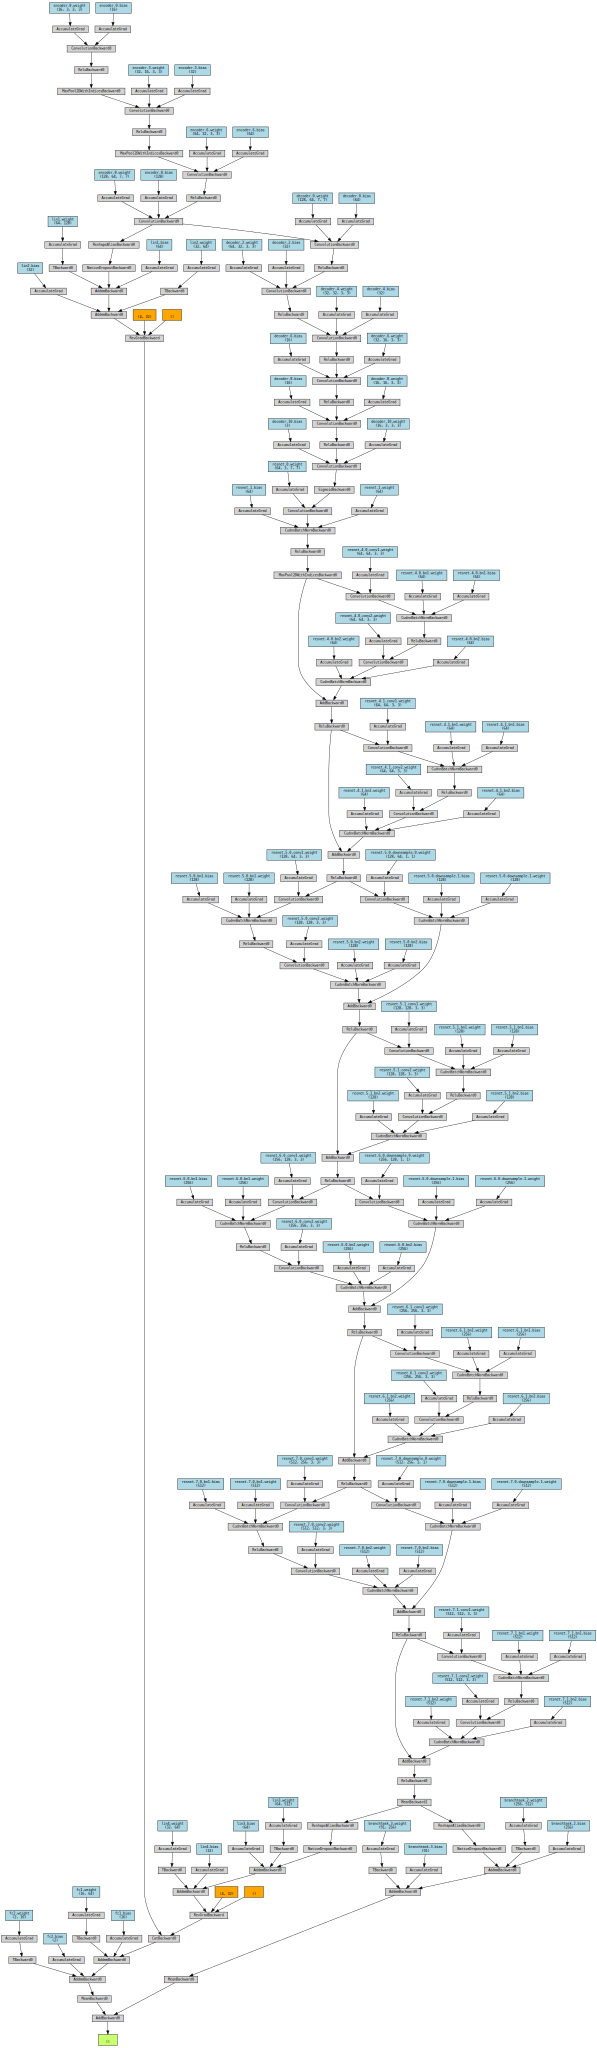

In [266]:
y = model_bm_ae(torch.randn(4,3,224,224).to(device))
make_dot(y[0].mean()+y[1].mean(), params=dict(model_bm_ae.named_parameters()))

In [267]:
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super().__init__()        
#         # N, 3, 224, 224
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 16, 3, stride=2, padding=1), # -> N, 16, 112, 112
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2), # -> N, 16, 56, 56
#             nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 28, 28
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2), # -> N, 32, 14, 14
#             nn.Conv2d(32, 64, 3, stride=2, padding=1), # -> N, 64, 7, 7
#             nn.ReLU(),
#             nn.Conv2d(64, 128, 7) # -> N, 128, 1, 1
#         )
        
#         # N , 64, 1, 1
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, 7), # -> N, 64, 7, 7
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 14, 14 
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 28, 28 
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 56, 56 
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 112, 112 
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1), # N, 3, 224, 224 
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

In [268]:
# ae = Autoencoder()

# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(ae.parameters(),
#                              lr=3e-4, 
#                              weight_decay=1e-5)

# ae.to(device)
# summary(ae,(3,224,224))

In [269]:
activation_onlyae = {}
dataloader_modelleakage_ae = DataLoader(datasetbm, batch_size=64)

def get_activation_ae(name):
    def hook(model, input, output):
        #print(model)
        activation_onlyae[name] = output.detach()
    return hook


modelae = model_bm_mc_trained

modelae = modelmb.to(device)
modelae.branchtask[2].register_forward_hook(get_activation_ae('fae'))

xmb = next(iter(dataloader_modelleakage_mb))
xmb = xmb[0]
xmb = xmb.to(device)
mb_y = xmb[1]
output_ae = modelae(xmb)
print(output_ae)

(tensor([[ 0.6682,  0.4804],
        [ 0.6954,  0.3704],
        [ 0.2893,  0.0022],
        [ 0.3961,  0.7185],
        [ 0.6575,  0.2954],
        [ 0.2391,  0.1909],
        [-0.4288,  0.1787],
        [ 0.6565,  0.1056],
        [ 0.3688,  0.6731],
        [ 0.1391,  0.1515],
        [ 0.0837, -0.0026],
        [ 0.8561,  0.0642],
        [ 0.2479,  0.0220],
        [ 0.4292,  0.4778],
        [ 0.3100,  0.5831],
        [ 1.1243,  0.4754],
        [ 1.0703,  0.0348],
        [ 0.1570, -0.1115],
        [ 0.7762,  0.4202],
        [ 0.7873,  0.3244],
        [ 0.2790,  0.1058],
        [ 0.0162,  0.0392],
        [ 0.6180,  0.4207],
        [ 0.3685,  0.2521],
        [ 0.3491,  0.1064],
        [ 0.5583, -0.0693],
        [ 0.2475,  0.3893],
        [-0.0420,  0.2271],
        [ 0.2467,  0.1293],
        [ 0.2308,  0.0774],
        [ 0.0102, -0.0887],
        [ 0.4142, -0.1031],
        [ 0.1313,  0.6937],
        [ 0.5412,  0.5787],
        [ 0.1648,  0.1145],
        [ 0.3470,  

In [270]:
activation_onlyae['fae'].shape

torch.Size([64, 256])

In [272]:
tensor_x_AE = activation_onlyae['fae']
tensor_y_AE = torch.tensor(y_arr)[:64]
print(tensor_x_AE.shape)
print(tensor_y_AE.shape)
tensor_y_AE = tensor_y_AE.type(torch.FloatTensor)

dsae = TensorDataset(tensor_x_AE,tensor_y_AE) # create your datset
dlae = DataLoader(dsae, batch_size=2) # create your dataloader


loss_f = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
correct = 0

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    c = train(dlae, model, loss_f, optim)
    accuracy = 100 * c / len(dsae)
    print("Accuracy is:",accuracy)
print("Done!")


torch.Size([64, 256])
torch.Size([64])
Epoch 1
-------------------------------
loss: 0.462675  [    0/   32]
Accuracy is: 90.625
Epoch 2
-------------------------------
loss: 0.454741  [    0/   32]
Accuracy is: 90.625
Epoch 3
-------------------------------
loss: 0.446850  [    0/   32]
Accuracy is: 90.625
Epoch 4
-------------------------------
loss: 0.439012  [    0/   32]
Accuracy is: 90.625
Epoch 5
-------------------------------
loss: 0.431274  [    0/   32]
Accuracy is: 90.625
Epoch 6
-------------------------------
loss: 0.423641  [    0/   32]
Accuracy is: 90.625
Epoch 7
-------------------------------
loss: 0.416084  [    0/   32]
Accuracy is: 90.625
Epoch 8
-------------------------------
loss: 0.408620  [    0/   32]
Accuracy is: 90.625
Epoch 9
-------------------------------
loss: 0.401232  [    0/   32]
Accuracy is: 90.625
Epoch 10
-------------------------------
loss: 0.393904  [    0/   32]
Accuracy is: 90.625
Done!
